# Ejemplo de FIS tipo Mamdani

In [1]:
import numpy as np
from FuzzySystem.FuzzySet import FuzzySet
from FuzzySystem.FuzzyVariable import FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import FuzzyInferenceSystem
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, Trapmf
from FuzzySystem.FuzzyInferenceSystem import FuzzyRule, Antecedent, TSKConsequent, Consequent
from FuzzySystem.Defuzzifier import CenterOfSets, Centroid, Heights

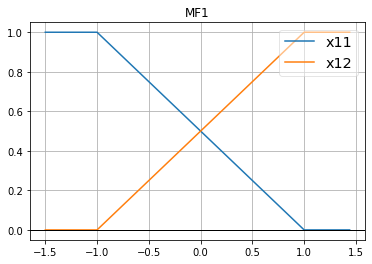

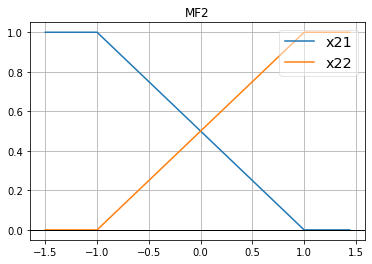

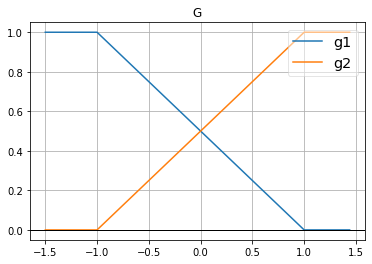


Evaluation of FIS with inputs:
('MF1', -0.3)
('MF2', 0.6)
	IF MF1 is x11 and MF2 is x21 THEN G is g1 = [0.2] with weight = 1
	IF MF1 is x11 and MF2 is x22 THEN G is g2 = [0.65] with weight = 1
	IF MF1 is x12 and MF2 is x21 THEN G is g1 = [0.2] with weight = 1
	IF MF1 is x12 and MF2 is x22 THEN G is g2 = [0.35] with weight = 1


In [2]:
#INPUTS
x11 = FuzzySet('x11', Trapmf([-1.5,-1.5,-1,1]))
x12 = FuzzySet('x12', Trapmf([-1,1,1.5,1.5]))
mf1 = FuzzyVariable('MF1',[x11, x12], universe=[-1.5, 1.5])
mf1.show()

x21 = FuzzySet('x21', Trapmf([-1.5,-1.5,-1,1]))
x22 = FuzzySet('x22', Trapmf([-1,1,1.5,1.5]))
mf2 = FuzzyVariable('MF2',[x21, x22], universe=[-1.5, 1.5])
mf2.show()

#OUTPUT

g1 = FuzzySet('g1', Trapmf([-1.5,-1.5,-1,1]))
g2 = FuzzySet('g2', Trapmf([-1,1,1.5,1.5]))
G = FuzzyVariable('G',[g1, g2], universe=[-1.5, 1.5])
G.show()


#RULES

ant1  = Antecedent(mf1['x11'] & mf2['x21'])
rule1 = FuzzyRule(ant1, Consequent(G['g1']))

ant2  = Antecedent(mf1['x11'] & mf2['x22'])
rule2 = FuzzyRule(ant2, Consequent(G['g2']))

ant3  = Antecedent(mf1['x12'] & mf2['x21'])
rule3 = FuzzyRule(ant3, Consequent(G['g1']))

ant4  = Antecedent(mf1['x12'] & mf2['x22'])
rule4 = FuzzyRule(ant4, Consequent(G['g2']))

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3, rule4], and_op='min', or_op='sum')

#FIS Evaluation

inputs = (('MF1',np.float(-0.3)), ('MF2',np.float(0.6)))
result = fis.eval(inputs)

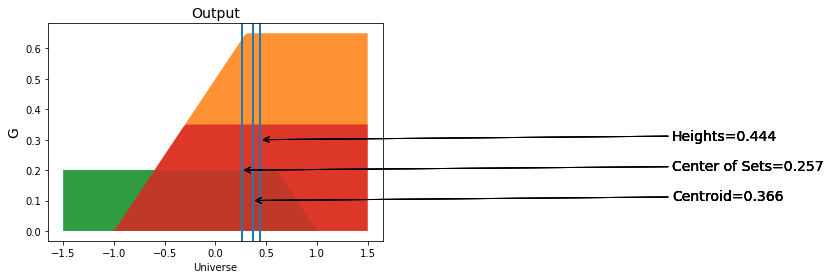

In [3]:
result.show([Centroid, CenterOfSets, Heights])